# Motivation

## Why Python?

![](images/motivation/python_r_development.png)

> Python is an unusual case for being both one of the **most visited** tags on Stack Overflow and one of the **fastest-growing** ones. (Incidentally, it is also accelerating! Its year-over-year growth has become faster each year since 2013). Source: [StackOverflow Blog](https://stackoverflow.blog/2017/09/06/incredible-growth-python/)

Python...
- is beginner friendly
- flexible
- readable
- has a big onliny community
- is a first-class tool for scientific computing tasks
- is used in Remote Sensing, Machine Learning, Big Data Analysis, Image Processing , Data Visualization
- is the 2nd most demanded programming skill (in the US)
- is the 2nd best paid programming skill (> 105'000$ in the US)
- is heavily used at large companies like Google & Facebook but also at NASA, ESA, EUMETSAT, etc.

## Aim of the course

At the end of this course you will be able ...

In [2]:
import pandas as pd
import numpy as np
import xarray as xr
import satpy
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.pyplot import rcParams
import warnings

rcParams['figure.figsize'] = 8,6
rcParams['font.size'] = 14

def func(x,a):
    return np.exp(x) + a

xdata = np.linspace(0, 4, 50)
y = func(xdata,5)
y_noise = 5.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise

warnings.filterwarnings('ignore')

... to work with the basic concepts of Python:

In [5]:
for i in range(10):
    if i==5:
        print("fünf")
    else:
        print(i)

0
1
2
3
4
fünf
6
7
8
9


... to read, interpret and manipulate your scientific data with the standard Python tools for data science (numpy, scipy, pandas):

In [3]:
tabelle = pd.read_csv('data/frankfurt_weather.csv',parse_dates=['time'],index_col="time",sep=",")
tabelle.head()

,visibility,air_temperature,dewpoint,wind_direction,wind_speed,air_pressure,cloud_height,cloud_cover
time,,,,,,,,
2015-01-01 00:20:00,2800,1.0,1.0,0.0,0.0,1036.0,200.0,OVC
2015-01-01 00:50:00,1500,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:20:00,1000,1.0,1.0,0.0,0.0,1036.0,100.0,OVC
2015-01-01 01:50:00,700,1.0,1.0,0.0,0.0,1036.0,NaN,NaN
2015-01-01 02:20:00,600,1.0,1.0,0.0,0.0,1036.0,NaN,NaN


... to plot your data in various ways using matplotlib:

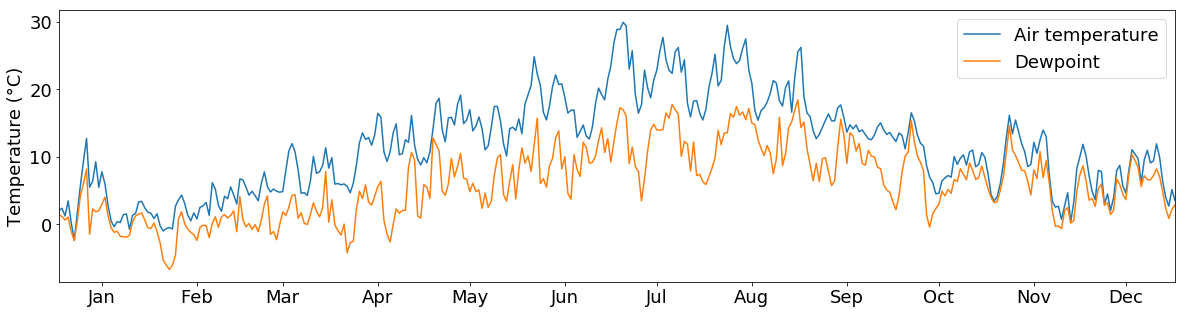

In [4]:
temp_resampled = tabelle.air_temperature.resample("1d").mean()
dewpt_resampled = tabelle.dewpoint.resample("1d").mean()

plt.figure(figsize=(20,5))
plt.rcParams['font.size'] = 18

plt.plot(temp_resampled,label="Air temperature")
plt.plot(dewpt_resampled,label="Dewpoint")

plt.legend()
plt.ylabel("Temperature (°C)")
plt.xlim(("2015-01-01","2015-12-31"))
plt.xticks(["2015-{:02d}-15".format(x) for x in range(1,13,1)],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.show()

... to statistically analyze your data and know how to build statistical (maybe even machine learning) models using scikit-learn:

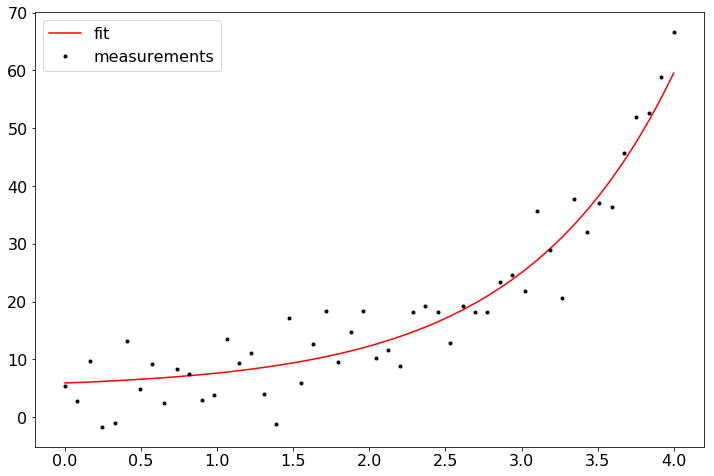

In [11]:
popt, pcov = curve_fit(func, xdata, ydata)
plt.figure(figsize=(12,8))
plt.rcParams['font.size'] = 16
plt.plot(xdata, func(xdata, popt), 'r-', label='fit')
plt.plot(xdata, ydata, label='measurements', c = "k", marker = ".", lw= 0)
plt.legend()
plt.show()

... to visualize your data in map plots with CartoPy:

![](images/motivation/basemap_example.png) 

... to read, reproject and visualize meteorological satellite data using satpy (e.g. Meteosat):

![](images/motivation/msg_example.png) 

... to generate colour composites of meteorological satellite data for different use cases:

In [5]:
datei = ["data/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_20180112120010.nc"]

files = {'seviri_l1b_nc' : datei}

scn = satpy.Scene(filenames=files)
available_bands = np.unique(np.asarray([x.name for x in scn.available_dataset_ids()]))
scn.load(available_bands)

compo = "natural_color"
scn.load([compo])
scn.show(compo)
scn[compo] = scn[compo][:,100:-100,100:-100]

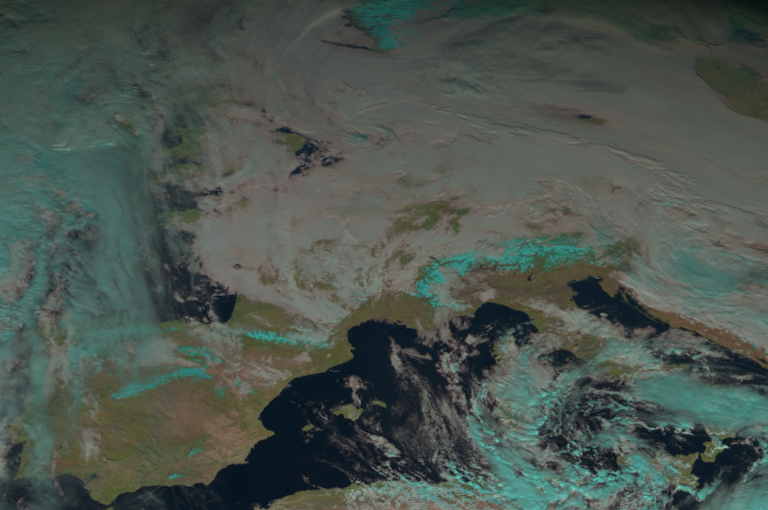

In [3]:
scn.show("natural_color")

In [4]:
datei = ["data/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_20180112120010.nc"]

files = {'seviri_l1b_nc' : datei}

scn = satpy.Scene(filenames=files)
available_bands = np.unique(np.asarray([x.name for x in scn.available_dataset_ids()]))
scn.load(available_bands)

compo = "snow"
scn.load([compo])
scn.show(compo)
scn[compo] = scn[compo][:,100:-100,100:-100]

Directory /path/to/radiance/tb/lut/data does not exist! Check config file


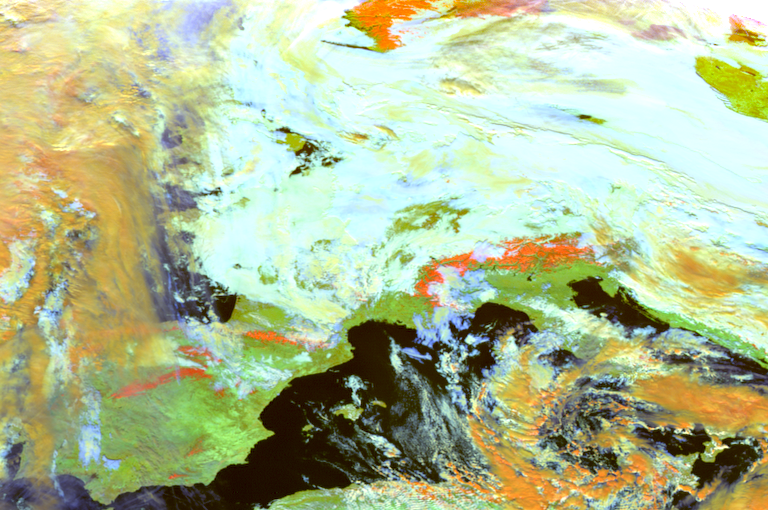

In [84]:
scn.show("snow")

In [93]:
datei = ["data/W_XX-EUMETSAT-Darmstadt,VIS+IR+IMAGERY,MSG3+SEVIRI_C_EUMG_20180112120010.nc"]

files = {'seviri_l1b_nc' : datei}

scn = satpy.Scene(filenames=files)
available_bands = np.unique(np.asarray([x.name for x in scn.available_dataset_ids()]))
scn.load(available_bands)

compo = "day_microphysics"
scn.load([compo])
scn.show(compo)
scn[compo] = scn[compo][:,100:-100,100:-100]

Directory /path/to/radiance/tb/lut/data does not exist! Check config file


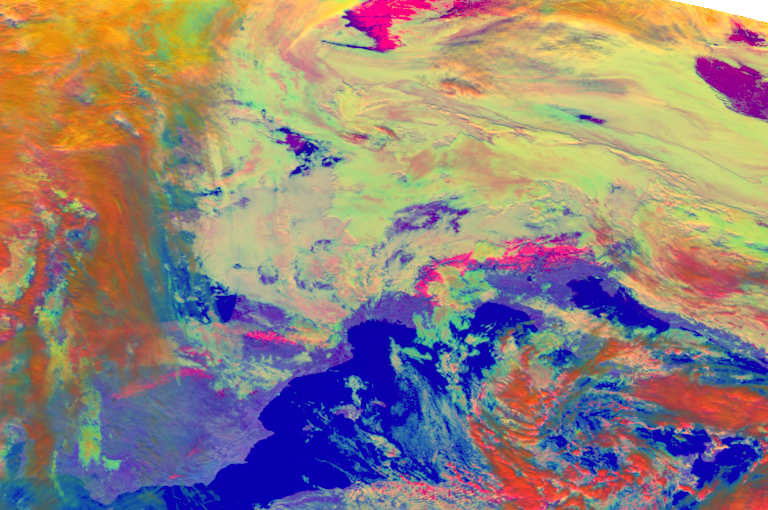

In [94]:
scn.show("day_microphysics")

... and to manipulate and interpret meteorological satellite data for scientific purposes:

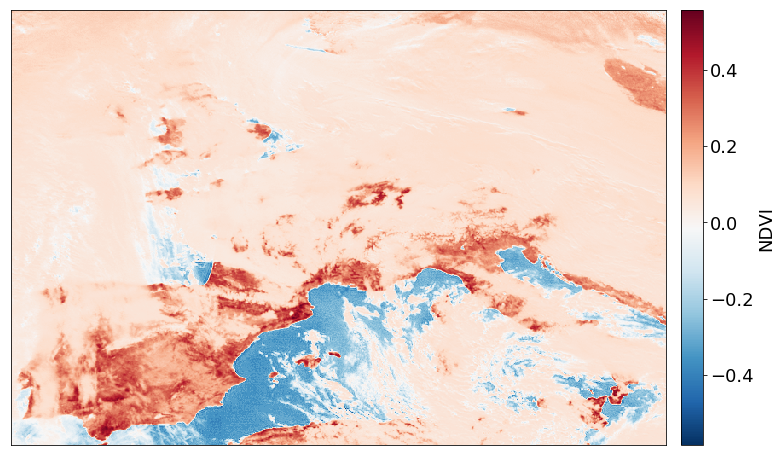

In [6]:
plt.figure(figsize=(14,8))

scn["ndvi"] = (scn[0.8] - scn[0.6]) / (scn[0.8] + scn[0.6])[100:-100,100:-100]

im = plt.imshow(np.array(scn["ndvi"].data),cmap="RdBu_r")
cb = plt.colorbar(im,fraction=0.046, pad=0.02)
cb.set_label("NDVI")
plt.xticks([]); plt.yticks([])
plt.show()